In [11]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt

In [12]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (64, 64, 3), 
                             activation = 'relu'))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))
classifier.add(Dense(output_dim = 6, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=6)`


In [13]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset6/train_set6',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset6/test_set6',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

Found 2133 images belonging to 6 classes.
Found 814 images belonging to 6 classes.


In [14]:
#print(training_set)

In [4]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

W0716 22:28:13.046681 17000 deprecation.py:323] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 22:28:13.091516 17000 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
200/200 [==============================] - 307s 2s/step - loss: 0.6740 - acc: 0.8136 - val_loss: 0.1355 - val_acc: 0.9781
Epoch 2/10
200/200 [==============================] - 249s 1s/step - loss: 0.0573 - acc: 0.9887 - val_loss: 0.0750 - val_acc: 0.9807
Epoch 3/10
200/200 [==============================] - 253s 1s/step - loss: 0.0182 - acc: 0.9981 - val_loss: 0.0166 - val_acc: 0.9968
Epoch 4/10
200/200 [==============================] - 299s 1s/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0326 - val_acc: 0.9936
Epoch 5/10
200/200 [==============================] - 271s 1s/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0321 - val_acc: 0.9938
Epoch 6/10
200/200 [==============================] - 261s 1s/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0093 - val_acc: 0.9968
Epoch 7/10
200/200 [==============================] - 245s 1s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0538 - val_acc: 0.9936
Epoch 8/10
200/200 [==============================] - 245s 1s/step - 

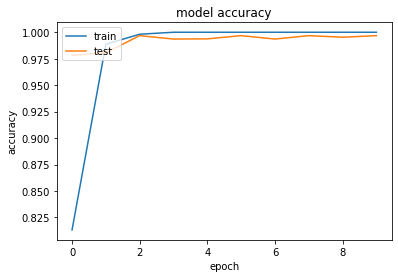

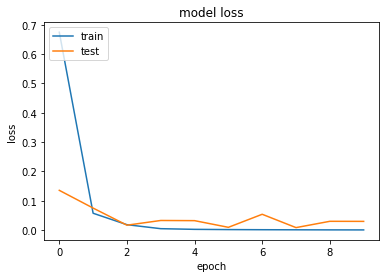

In [5]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
# save model and architecture to single file
classifier.save("model.h6")
print("Saved model to disk")

Saved model to disk


In [7]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model

import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt #To display the image
 
# load model
classifier = load_model('model.h6')

[3]


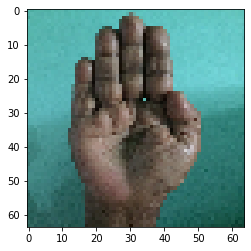

In [62]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/1/IMG_4584.jpg', target_size = (64, 64))

test_image = test_image.rotate(-90)

plt.imshow(test_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

#training_set.class_indices

In [63]:
if result == 0:
    prediction = 'Sign 1'
elif result == 1:
    prediction = 'Sign 2'
elif result == 2:
    prediction = 'Sign 3'
elif result == 3:
    prediction = 'Sign 4'
elif result == 4:
    prediction = 'Sign 5'
elif result == 5:
     prediction = 'Sign 6'

print(prediction)

Sign 4
